# Data Cleaning

Data cleaning is the process of identifying and correcting or removing errors and inconsistencies from datasets. It is a critical step in any data analysis project, as dirty data can lead to inaccurate or misleading results. Common issues that require data cleaning include missing data, duplicate data, outliers, and inconsistent data formats. In this notebook, we will explore some of the key techniques and tools involved in data cleaning using Python."

**Important Note:** The slides in the deck have modified versions of the dataset to illustrate and provide examples for various errors to clean. The real dataset for this project may not have the same errors, so don't expect to find the exact same observations as in the slides.

In [1]:
# First import the libraries you'll need
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('real_estate.csv')
df.tail()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
1878,385000,2002,1250,381,5,6,6381,2004,224334,1.0,Bunglow
1879,690000,2015,1553,473,5,6,6501,1956,23086,1.0,Bunglow
1880,600000,1999,942,287,5,6,7064,1995,217800,1.0,Bunglow
1881,759900,2009,803,245,5,6,7500,2006,8886,1.0,Bunglow
1882,735000,2015,1459,444,5,6,7515,1958,10497,1.0,Bunglow


#### Now let's get started with cleaning the data!

In [3]:
df.describe()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0
mean,422839.807754,2007.111524,466.777483,140.454063,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0
std,151462.593276,5.196898,231.656645,72.929765,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0
min,200000.000000,1993.000000,88.000000,30.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0
25%,300000.000000,2004.000000,320.000000,94.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0
50%,392000.000000,2007.000000,426.000000,125.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0
75%,525000.000000,2011.000000,569.000000,169.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0
max,800000.000000,2016.000000,4508.000000,1374.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0


## I. Handle Missing Data

* For example, the `basement` feature? It has values **1** and **NaN**.

In [4]:
# Display unique values of 'basement'
df['basement'].unique()

array([nan,  1.])

The **NaN** values are missing values. They actually indicate that the property does not have a `basement`. Therefore, let's replace them with the value **0**.

Using the `.fillna()` function replace **NaN** values with 0. 

In [5]:
# Replace missing basement values to 0
# inplace=True updates the values in the original DataFrame.
#df['basement']= df['basement'].fillna(0)
df['basement'].fillna(0, inplace=True)

In [6]:
# Display unique values of 'basement'
df['basement'].unique()

array([0., 1.])

In [7]:
# change the basement type to integer
df.basement=df.basement.astype(int)

## II. Remove "Guilty" Outliers

Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models. If you have a good reason to remove an outlier, it will help your model's performance.

#### A. Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.
* Among those features, do any look like they have potential outliers?

In [8]:
import warnings
warnings.filterwarnings('ignore')

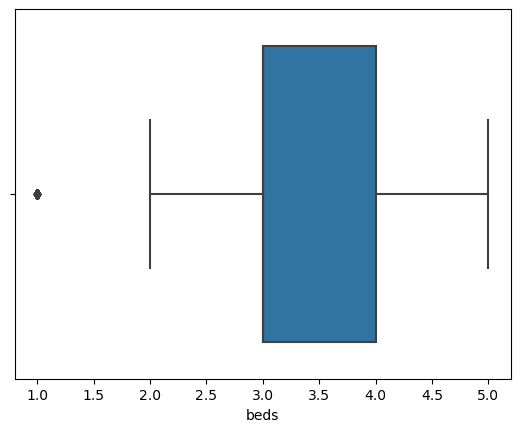

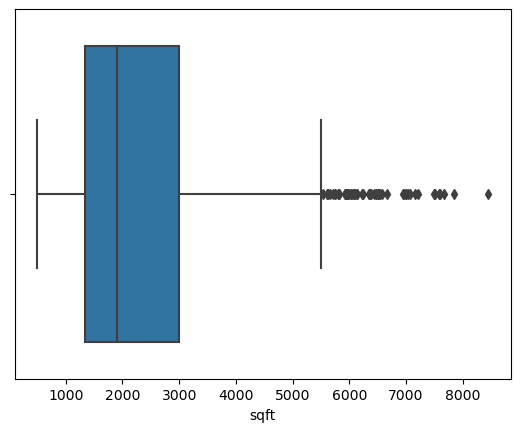

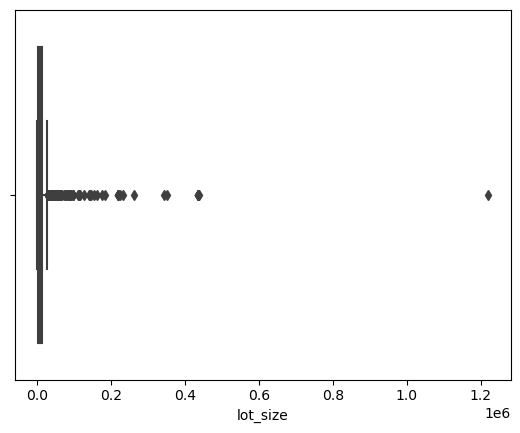

In [9]:
# box plot of beds
sns.boxplot(df.beds, data=df)
plt.show()
# Violin plot of sqft
sns.boxplot(df.sqft, data=df)
plt.show()
# Violin plot of lot_size
sns.boxplot(df.lot_size, data=df)
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! Look at its long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

#### B. Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [10]:
# Print top 5 homes with largest lot_size
df.lot_size.sort_values().tail()

1115     435600
1832     436035
1876     436035
1111     436471
102     1220551
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

#### C. Display the entire row for that observation with the huge lot size.
* How many bedrooms and bathrooms does the property have?
* What's its property type?
* What's its transaction price?
* **Do you think this observation could be an outlier? Why?**

In [11]:
# print the record where lot_size = 1220551
#df.iloc[102]
df[df.lot_size == 1220551]

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
102,292999,2014,230,79,2,1,875,1950,1220551,0,Condo


#### D. Since all of the other observations are below 500,000 sqft, let's remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.
* You can use a boolean mask to do so (filter to keep only wanted observations).
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [12]:
# Drop the row with lot_size = 1220551
df = df.drop(102)

## IV. Save the Cleaned Dataset

#### Finally, save the cleaned dataframe as  <code style="color:steelblue">'cleaned_df.csv'</code>

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [13]:
# Save the cleaned dataset
df.to_csv('cleaned_df.csv', index=None)


We will use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!
In the next module, **Feature Engineering**, you'll use the cleaned dataset to create new features that will improve model performance.